# 신경망(Neural Network)
- 퍼셉트론을 통해 복잡한 함수도 표현이 가능함을 확인하였음
- 하지만, 가중치(Weight, Bias)를 설정하는 작업은 사람이 수동으로 정의해주었었음
- 신경망은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 성질이 있음

## 퍼셉트론에서 신경망으로
- 퍼셉트론과 신경망은 공통점이 많음
- 신경망은 입력층, 출력층, 은닉층으로 구성되어있음

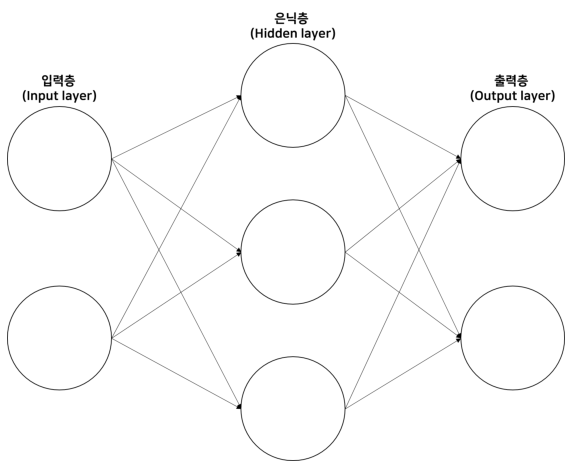

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = plt.imread('NeuralNetwork.png')
plt.figure(figsize=(10, 10))
plt.axes().axis('off')
imgplot = plt.imshow(img)

#### 그림 1. 신경망의 예

- 그림 1을 통해 신경망의 예시를 확인할 수 있다.
- 그림 1의 신경망은 모두 3층으로 구성되었지만, 가중치를 갖는 층(입력->은닉, 은닉->출력)은 2개이기에 2층 신경망이라고 부른다.
- 하지만, 작성자에 따라 3층 신경망이라고 부르는 경우가 있다.  
- 앞서 본 퍼셉트론과 별반 달라보이지 않는데, 실제로 뉴런과의 연결 방식은 퍼셉트론과 다르지 않다.  

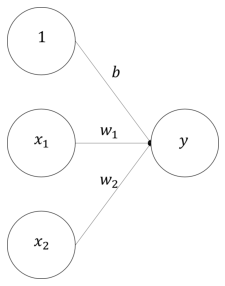

In [7]:
img = plt.imread('Perceptron_bias.png')
plt.figure(figsize=(5, 5))
plt.axes().axis('off')
imgplot = plt.imshow(img)

#### 그림 2. 편향이 명시된 퍼셉트론
- 좀 더 나아가서 편향을 명시한 퍼셉트론은 그림 2와 같다.
- 기존의 퍼셉트론에서 가중치가 b이고 입력이 1인 뉴런이 추가되었음

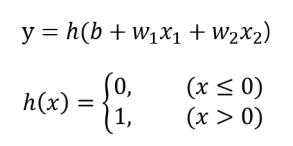

In [8]:
img = plt.imread('NeuralNetwork_formula.png')
plt.figure(figsize=(5, 5))
plt.axes().axis('off')
imgplot = plt.imshow(img)

- 위의 식은 입력 신호의 총합이 h(x) 함수를 통해 y값이 출력되는 식이다. 결론은 퍼셉트론 식과 같은 역할을 하는 것임  
- 앞서 h(x) 함수가 등장하였는데, 이처럼 신호의 총합(입력 신호)을 출력 신호로 변환하는 함수를 활성화 함수(Activation Function)라 한다.
- 활성화라는 이름과 같이 입력 신호의 총합이 활성화를 일으키는지 정하는 역할을 한다.

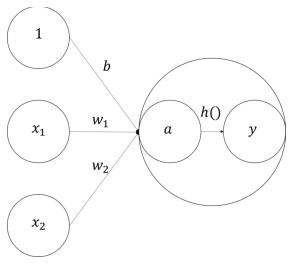

In [9]:
img = plt.imread('ActivationProcess.png')
plt.figure(figsize=(5, 5))
plt.axes().axis('off')
imgplot = plt.imshow(img)

#### 그림 3. 활성화 함수의 처리 과정
- 그림 3은 활성화 함수의 처리과정을 나타낸 그림이다.

## 활성화 함수
- 활성화 함수는 임계값을 경계로 출력이 바뀌는 함수를 뜻함
- 퍼셉트론의 활성화 함수는 계단 함수(Step Function)을 이용하였음
- 활성화 함수는 계단 함수, 시그모이드(Sigmoid) 함수, ReLU(Rectified Linear Unit) 함수 등 다양한 함수가 있음  

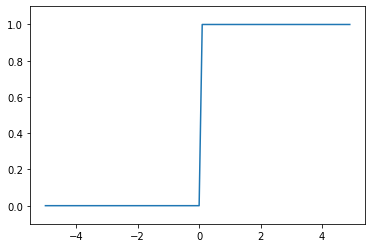

In [12]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 그림 4. 계단 함수 그래프
- 그림 4를 통해 계단 함수 그래프를 확인할 수 있다.
- 계단 함수는 이름과 같이 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수이다.

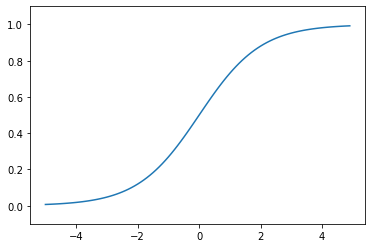

In [14]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 그림 5. 시그모이드 함수 그래프
- 그림 5를 통해 시그모이드 함수 그래프를 확인할 수 있다.
- 시그모이드 함수는 계단 함수에 비해 매끄러우며 연속적인 출력을 갖고 있음
- 계단 함수와 함께 시그모이드 함수는 입력이 커지면 출력이 커지고, 입력이 중요하지 않으면 출력이 작아짐

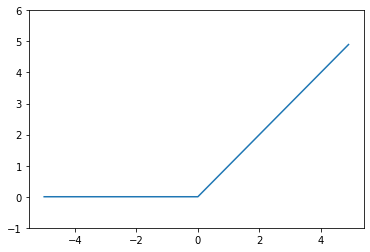

In [18]:
def ReLU(x):
    return np.maximum(0,x)

x=np.arange(-5.0, 5.0, 0.1)
y=ReLU(x)
plt.plot(x,y)
plt.ylim(-1.0, 6.0)
plt.show()

#### 그림 6. ReLU 함수 그래프
- 그림 6을 통해 ReLU 함수 그래프를 확인할 수 있다.
- 시그모이드 함수는 과거에 주로 이용되었지만, 최근에는 ReLU 함수를 주로 이용함
- ReLU 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하이면 0을 출력함

## 비선형 함수
- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 함 (선형 함수를 사용하면 안됨)
- 그 이유로, 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없기 때문
- 케이스 별로 비선형적인 가중치를 학습하지 못하므로(정해진 가중치만 학습하므로) 비선형 함수를 활용해야함 

## 3층 신경망 구현하기

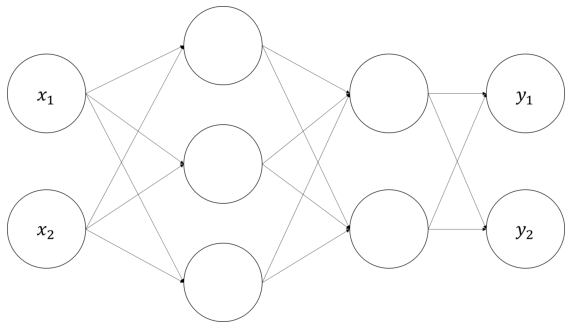

In [21]:
img = plt.imread('ThreeLayerNN.png')
plt.figure(figsize=(10, 10))
plt.axes().axis('off')
imgplot = plt.imshow(img)

#### 그림 7. 3층 신경망
- 그림 7을 통해 3층 신경망을 확인할 수 있음
- (0층)입력층 2개, (1층)은닉층 3개, (2층)은닉층 2개, (3층)출력층 2개로 구성

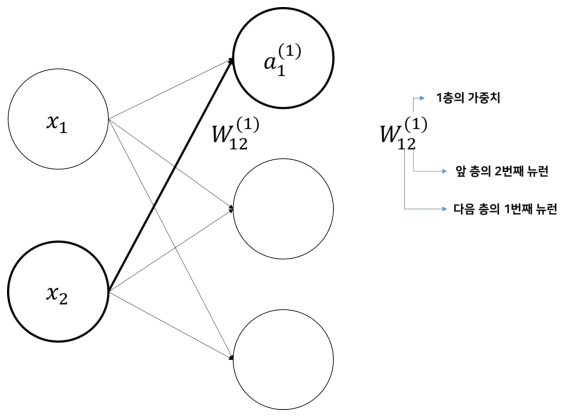

In [23]:
img = plt.imread('ExpressionNN.png')
plt.figure(figsize=(10, 10))
plt.axes().axis('off')
imgplot = plt.imshow(img)

#### 그림 8. 신경망 표기법
- 그림 8을 통해 신경망의 표기법을 확인할 수 있음

In [27]:
# 항등함수
def identity_function(x):
    return x

# 네트워크 정의
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# 순전파
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3) #출력층 : 항등 함수
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


- identity_function() : 선형함수로 입력을 그대로 출력함
- init_network() : 가중치와 편향을 초기화하고 딕셔너리 변수인 network에 저장
- forward() : 순전파 함수로 입력 신호를 출력으로 변환하는 처리 과정

## 출력층 설계하기

- 신경망은 분류(Classification)와 회귀(Regression)모두 활용가능
- 일반적으로 회귀에는 항등 함수, 분류에는 소프트맥스(Softmax) 함수를 사용
- 소프트맥스 함수 : 출력 값(0~1.0)을 확률로 해석이 가능함 (따라서, 분류에 사용), 지수 함수(e^x)를 사용하기에 오버플로의 문제가 있음

In [46]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

## 손글씨 숫자 인식
- MNIST 데이터 셋 [1] 을 활용하여 분류하기 위해 데이터 학습 및 추론
- https://github.com/WegraLee/deep-learning-from-scratch 파일 활용

In [35]:
# Dataset loading(pickle 활용)

import sys, os
sys.path.append(os.pardir) # 부모 디렉토리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [36]:
# 이미지 확인

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img) #이미지 팝업

5
(784,)
(28, 28)


In [39]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax #github common의 functions 활용


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f: # github ch03의 사전 학습 가중치 "sample_weight.pkl" 활용
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 배치 적용
- 배치(Batch)처리란 1개의 데이터를 N개로 묶어서 처리하는 것을 뜻함
- 묶인 대상을 배치라고 칭함

In [40]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 정리
- 신경망에서는 활성화 함수로 비선형 함수를 이용한다.
- Numpy의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현이 가능하다.
- 기계학습 문제는 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로 항등 함수(회귀), 소프트맥스 함수(분류)를 이용한다.
- 분류에서는 출력층의 뉴런 수로 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치(Batch)라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 빠르게 얻을 수 있다.

## Reference
- 밑바닥부터 시작하는 딥러닝, 사이토 고키, 한빛미디어, 2017
- https://ko.wikipedia.org/wiki/MNIST_데이터베이스  
- https://github.com/WegraLee/deep-learning-from-scratch 